In [1]:
import numpy as np
import pandas as pd
import os
from keras import models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import losses 
from keras import metrics
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

Using TensorFlow backend.


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'AirQualityANN_with_ML-Copy1.ipynb',
 'AirQualityANN_with_ML.ipynb',
 'cluster.ipynb',
 'find_next_3months_gas.ipynb',
 'input',
 'model',
 'Test.ipynb']

In [3]:
np.random.seed(121)

In [4]:
# set input directory
input_dir = 'input'

In [5]:
data = pd.read_csv(os.path.join(input_dir,'main_data.csv'))

In [6]:
data.head()

,NO,NO2,NOx,NH3,CO,SO2,class
0,6.99,2.85,11.93,26.64,0.60,4.53,good
1,7.20,1.27,10.65,25.63,0.56,4.22,good
2,7.19,0.91,10.37,29.16,0.57,4.46,good
3,7.14,1.07,10.48,28.95,0.57,4.53,good
4,7.09,0.36,9.73,28.41,0.48,4.63,good


In [7]:
data['class'].unique()

array(['good', 'moderate', 'poor', 'severe', 'satisfactory'], dtype=object)

In [8]:
class_label = ['good', 'moderate', 'poor', 'severe', 'satisfactory']

In [9]:
# data['class'].replace('good',0,inplace=True)
# data['class'].replace('moderate',1,inplace=True)
# data['class'].replace('satisfactory',2,inplace=True)
# data['class'].replace('poor',3,inplace=True)
# data['class'].replace('severe',4,inplace=True)

In [10]:
data['class'] = data['class'].astype('category')

In [11]:
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [12]:
data.head()

,NO,NO2,NOx,NH3,CO,SO2,class
0,6.99,2.85,11.93,26.64,0.60,4.53,0
1,7.20,1.27,10.65,25.63,0.56,4.22,0
2,7.19,0.91,10.37,29.16,0.57,4.46,0
3,7.14,1.07,10.48,28.95,0.57,4.53,0
4,7.09,0.36,9.73,28.41,0.48,4.63,0


In [13]:
data.ndim

2

In [14]:
data.shape

(14704, 7)

In [15]:
data.columns

Index(['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'class'], dtype='object')

In [16]:
data.groupby('class').describe()

NO                                                                  \
        count       mean        std    min      25%     50%       75%     max   
class                                                                           
0      6601.0   7.738029   6.849134   0.03   2.9900   5.960    9.9600   58.72   
1      4958.0  12.841105   7.780266   1.23   7.7125  10.945   15.9650   70.60   
2      2044.0  39.312392  18.994279   3.91  25.6975  35.870   50.6825  150.78   
3       481.0  10.834137   8.210643   0.79   6.0900   8.770   12.1400   77.80   
4       620.0  97.409339  36.582816  15.68  72.1300  91.325  119.8725  270.09   

          NO2             ...      CO            SO2                        \
        count       mean  ...     75%    max   count       mean        std   
class                     ...                                                
0      6601.0  14.411392  ...  1.0600  48.07  6601.0   9.552518   8.179881   
1      4958.0  32.868899  ...  1.1700  21.83  4958.0  10.377047   6.818879   
2      2044.0  49.711977  ...  1.6025  30.44  2044.0  14.842593   9.003026   
3       481.0  18.667027  ...  1.2300  11.54   481.0   8.007464   5.514462   
4       620.0  71.705081  ...  2.3500  29.46   620.0  18.634968  10.456291   

                                             
        min      25%    50%      75%    max  
class                                        
0      0.41   4.9200   7.05  11.6000  92.66  
1      0.71   6.1900   8.96  12.5900  81.59  
2      0.01   9.7775  13.04  17.5625  78.88  
3      1.26   4.0400   6.55  10.7900  48.03  
4      2.56  12.3475  16.85  22.2025  79.83  

[5 rows x 48 columns]

In [17]:
pd.isnull(data).sum()

NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
class    0
dtype: int64

In [18]:
pd.isna(data).sum()

NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
class    0
dtype: int64

In [19]:
x = data.drop('class',axis =1)
y = data['class']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle=True)

In [20]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10292, 6) (10292,) (4412, 6) (4412,)


In [21]:
x_train.head()

,NO,NO2,NOx,NH3,CO,SO2
26,2.96,0.15,3.69,25.10,0.31,8.49
7113,14.65,25.52,27.65,27.99,0.85,10.84
8437,5.09,10.36,14.06,10.59,0.89,7.65
5387,9.79,16.96,26.02,30.73,0.82,10.53
10101,11.20,49.13,50.99,22.90,0.84,10.84


In [22]:
y_train.head()

26       0
7113     1
8437     0
5387     1
10101    1
Name: class, dtype: int8

In [23]:
train_data = pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')

In [24]:
train_data.head()

,NO,NO2,NOx,NH3,CO,SO2,class
26,2.96,0.15,3.69,25.10,0.31,8.49,0
7113,14.65,25.52,27.65,27.99,0.85,10.84,1
8437,5.09,10.36,14.06,10.59,0.89,7.65,0
5387,9.79,16.96,26.02,30.73,0.82,10.53,1
10101,11.20,49.13,50.99,22.90,0.84,10.84,1


In [25]:
test_data.head()

,NO,NO2,NOx,NH3,CO,SO2,class
1120,25.75,26.49,52.24,24.71,0.00,6.71,1
3804,22.38,25.97,45.49,42.71,3.12,16.66,1
3907,15.62,16.16,27.33,36.09,2.92,6.70,1
11495,44.27,54.49,98.47,28.97,1.56,11.57,2
8383,4.86,8.74,11.95,8.93,0.92,8.03,0


In [26]:
test_data['class'].unique()

array([1, 2, 0, 3, 4], dtype=int64)

In [27]:
train_data.to_csv('input/train.csv',index_label='Index')
test_data.to_csv('input/test.csv',index_label='Index')

In [28]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10292, 6) (10292,) (4412, 6) (4412,)


In [29]:
train_data.describe()

,NO,NO2,NOx,NH3,CO,SO2,class
count,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000
mean,17.425519,27.953659,32.310382,26.782801,1.237958,10.857200,0.872328
std,22.847514,20.605992,30.389752,27.962423,1.895622,8.250115,1.033415
min,0.030000,0.010000,0.000000,0.020000,0.000000,0.010000,0.000000
25%,5.450000,12.577500,13.767500,10.530000,0.600000,5.650000,0.000000
50%,9.820000,22.765000,23.810000,19.475000,0.890000,8.855000,1.000000
75%,18.762500,38.240000,39.682500,34.422500,1.280000,13.320000,1.000000
max,270.090000,162.500000,293.100000,352.890000,47.930000,92.660000,4.000000


In [30]:
test_data.describe()

,NO,NO2,NOx,NH3,CO,SO2,class
count,4412.00000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,18.44085,28.431961,33.652652,26.627019,1.272063,10.994288,0.904578
std,23.90710,21.314177,32.116231,27.622688,1.992268,8.324729,1.059425
min,0.06000,0.030000,0.000000,0.010000,0.000000,0.410000,0.000000
25%,5.44000,12.575000,13.980000,10.407500,0.620000,5.810000,0.000000
50%,10.12000,22.815000,24.315000,19.445000,0.910000,9.070000,1.000000
75%,20.56000,38.672500,41.285000,34.400000,1.290000,13.430000,1.000000
max,268.03000,149.120000,254.800000,323.480000,48.070000,82.070000,4.000000


In [31]:
x_train.dtypes

NO     float64
NO2    float64
NOx    float64
NH3    float64
CO     float64
SO2    float64
dtype: object

In [32]:
y_train.dtypes

dtype('int8')

In [33]:
y_train.head(10)

26       0
7113     1
8437     0
5387     1
10101    1
11372    0
4648     0
11471    4
11983    0
2759     0
Name: class, dtype: int8

In [34]:
y_test.head(10)

1120     1
3804     1
3907     1
11495    2
8383     0
4324     1
6123     2
8242     2
3081     1
11711    2
Name: class, dtype: int8

# Done

In [35]:
from keras.utils import to_categorical

In [36]:
y_train_binary = to_categorical(y_train)

In [37]:
y_test_binary = to_categorical(y_test)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
x_std_train = scaler.fit_transform(x_train)
x_std_test = scaler.fit_transform(x_test)

In [41]:
# x_train_inverse = scaler.inverse_transform(x_std_train)
# x_test_inverse = scaler.inverse_transform(x_std_test)

In [42]:
model =Sequential()

In [43]:
model.add(Dense(32, input_dim =6, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='sigmoid'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [44]:
model.compile(
    optimizer=Adam(lr =0.0001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.fit(
    x_std_train,
    y_train_binary,
    epochs=5,
    validation_data=(x_std_test, y_test_binary),
    shuffle=True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10292 samples, validate on 4412 samples
Epoch 1/5
10292/10292 [==============================] - 2s 194us/step - loss: 1.1522 - acc: 0.5169 - val_loss: 0.6016 - val_acc: 0.6911
Epoch 2/5
10292/10292 [==============================] - 2s 158us/step - loss: 0.5300 - acc: 0.7797 - val_loss: 0.3134 - val_acc: 0.8758
Epoch 3/5
10292/10292 [==============================] - 2s 164us/step - loss: 0.3830 - acc: 0.8366 - val_loss: 0.2501 - val_acc: 0.8883
Epoch 4/5
10292/10292 [==============================] - 1s 145us/step - loss: 0.3259 - acc: 0.8565 - val_loss: 0.2008 - val_acc: 0.9066
Epoch 5/5
10292/10292 [==============================] - 2s 150us/step - loss: 0.2812 - acc: 0.8726 - val_loss: 0.1874 - val_acc: 0.9014


In [46]:
y_pred = model.predict(x_std_test, batch_size=10, verbose=0)

In [47]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

4412

In [48]:
y_true = []
for i in range(0, len(y_test_binary)):
    y_true.append(int(np.argmax(y_test_binary[i])))
len(y_true)

4412

In [49]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [50]:
cm_plot_labels = [
    'Good',
    'Satisfactory',
    'Moderate',
    'Poor',
    'Severe'
]

In [51]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1957
           1       0.93      0.91      0.92      1464
           2       0.73      0.88      0.80       650
           3       0.93      0.93      0.93       137
           4       0.00      0.00      0.00       204

    accuracy                           0.90      4412
   macro avg       0.71      0.74      0.72      4412
weighted avg       0.86      0.90      0.88      4412



C:\Users\poornima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
acc = accuracy_score(y_true=y_test, y_pred= y_predict)
print('Accuracy : ',acc*100)

Accuracy :  90.14052583862194


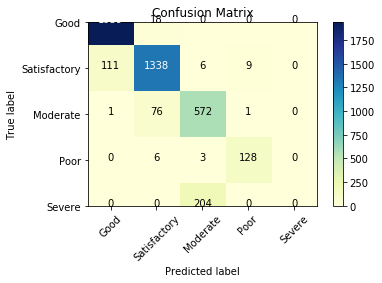

In [53]:
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [54]:
score = model.evaluate(x= x_std_test, y= y_test_binary, batch_size=32)
acc = score[1]
err = 1 - acc
print("Loss Value : ", score[0])
print("Accuracy : ", score[1])

4412/4412 [==============================] - 0s 30us/step
Loss Value :  0.18739614378346817
Accuracy :  0.9014052583862194


In [55]:
model_structure = model.to_json()
f = Path("model/model_structure.json")
f.write_text(model_structure)

3954

In [56]:
model.save_weights("model/model_weights.h5")

# Training the SVM

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
model_svm = SVC(C=1e20)

In [59]:
model_svm.fit(x_train, y_train)

C:\Users\poornima\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Predictions and Evaluation

In [60]:
predictions_svm = model_svm.predict(x_test)

In [61]:
acc_svm = accuracy_score(y_true=y_test, y_pred= predictions_svm)
print("Overall accuracy of SVM model using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM model using test-set is : 74.002720


In [62]:
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1957
           1       0.56      0.99      0.72      1464
           2       1.00      0.13      0.22       650
           3       1.00      0.09      0.16       137
           4       1.00      0.00      0.01       204

    accuracy                           0.74      4412
   macro avg       0.91      0.42      0.41      4412
weighted avg       0.85      0.74      0.69      4412



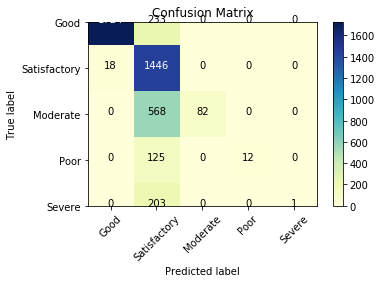

In [63]:
# confusion_matrix(y_test,predictions_svm))
# plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

cm = confusion_matrix(y_true=y_test, y_pred=predictions_svm)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Train the Logistic Regration

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression(C=1.0)

In [66]:
logreg.fit(x_train,y_train)

C:\Users\poornima\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\poornima\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = logreg.predict(x_test)

# Evaluating the Logistic Regration

In [68]:
acc_lr = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of LR model using test-set is : %f" %(acc_lr*100))

Overall accuracy of LR model using test-set is : 89.777879


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1957
           1       0.82      0.93      0.87      1464
           2       0.86      0.53      0.65       650
           3       0.92      0.96      0.94       137
           4       0.93      0.82      0.87       204

    accuracy                           0.90      4412
   macro avg       0.90      0.85      0.86      4412
weighted avg       0.90      0.90      0.89      4412



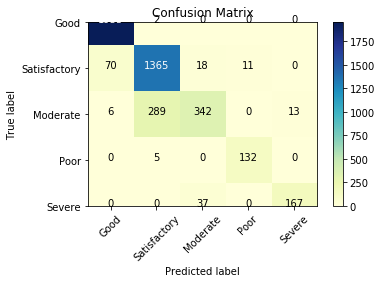

In [70]:
#print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Train the Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb_model = GaussianNB()

In [73]:
nb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
y_pred = nb_model.predict(x_test)

# Evaluating the Naive bayes

In [75]:
acc_nb = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of NB model using test-set is : %f" %(acc_nb*100))

Overall accuracy of NB model using test-set is : 90.117860


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1957
           1       0.86      0.90      0.88      1464
           2       0.85      0.90      0.87       650
           3       0.74      0.93      0.83       137
           4       0.82      0.95      0.88       204

    accuracy                           0.90      4412
   macro avg       0.85      0.92      0.88      4412
weighted avg       0.91      0.90      0.90      4412



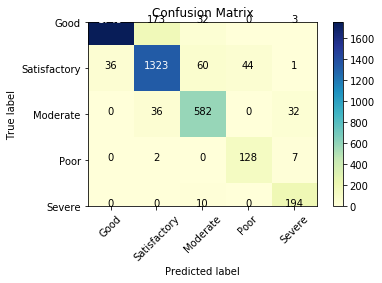

In [77]:
#print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Training the Random Forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(n_estimators=600)
rfc = rfc.fit(x_train,y_train)

# Predictions and Evaluation of RF Model

In [81]:
predictions_rf = rfc.predict(x_test)

In [82]:
acc_rf = accuracy_score(y_true=y_test, y_pred= predictions_rf)
print("Overall accuracy of RF model using test-set is : %f" %(acc_rf*100))

Overall accuracy of RF model using test-set is : 97.642792


In [83]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1957
           1       0.97      0.97      0.97      1464
           2       0.97      0.97      0.97       650
           3       0.97      0.96      0.97       137
           4       0.96      0.98      0.97       204

    accuracy                           0.98      4412
   macro avg       0.97      0.97      0.97      4412
weighted avg       0.98      0.98      0.98      4412



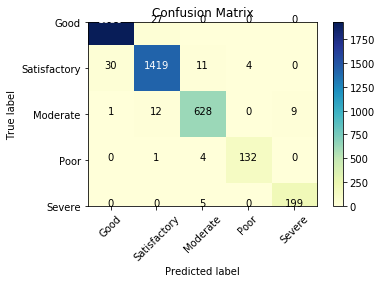

In [85]:
#print(confusion_matrix(y_test,predictions_rf))
cm = confusion_matrix(y_true=y_test, y_pred=predictions_rf)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Model Accuracy plot

In [86]:
import seaborn as sns
li_x = ['SVM', 'LR', 'NB','ANN', 'RF']
li_y = [acc_svm, acc_lr,acc_nb,acc,acc_rf]

[0.7400271985494107, 0.8977787851314597, 0.9011786038077969, 0.9014052583862194, 0.9764279238440616]


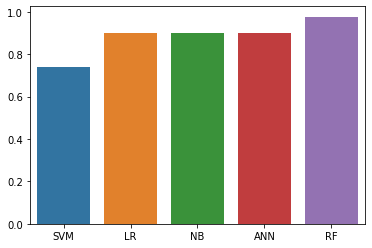

In [87]:
print(li_y)
sns.barplot(x=li_x, y=li_y)

# Thank You...